<a href="https://colab.research.google.com/github/Sigal-Ts/ML_project/blob/main/mta_final_term_exercise_2024_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final-term exercise

#1. Load your libraries here:

In [ ]:
#your code here:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.0 MB/s eta 0:00:00


#Part A:

#Upload your data file:

In [ ]:
#your code here:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import os
import zipfile
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Dropout, Input
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
from google.colab import files
file = files.upload()


Saving Apartment Prices.csv to Apartment Prices.csv
Saving mushroom_cleaned.csv to mushroom_cleaned.csv


#2. Read the file into a pandas data frame:
Split your data to:

a. X: the feature matrix

b. y: the label vector

In [ ]:
#your code here:
#Classification task when the prediction variable (label/Y/output).
#The data include observations of various mushroom characteristics
#and are designed to predict whether a mushroom is poisonous or not- 0:not poisonous, 1:poisonous.
df_mushroomCleaned= pd.read_csv("mushroom_cleaned.csv")

#Making a copy of the original df.
df_mushroomCleanedCo = df_mushroomCleaned.copy()

#Display the first rows of the copied DataFrame and the feature.
print("First few rows of the DataFrame:")
print(df_mushroomCleanedCo.head())

#Defining the Target Variable (Label).
#The class column from the DataFrame assigns to y.
#class represents the label we want to predict- if mushrooms are edible or poisonous.
y = df_mushroomCleanedCo['class']

#Defining the Features.
#Remove the class column to leave only the attribute columns, and assign them to the X variable.
X = df_mushroomCleanedCo.drop('class', axis=1)

#Displaying the properties and the predictor variable to verify that the split was performed correctly.
print("Features (X):")
print(X.head())
print("\nTarget variable(y):")
print(y.head())

#Get the number of observations (samples).
num_samples = df_mushroomCleanedCo.shape[0]
print(f"\nNumber of observations: {num_samples}")

First few rows of the DataFrame:
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2                2          10     3.612496   
3          1261          6                2          10     3.787572   
4          1305          6                2          10     3.711971   

   stem-width  stem-color    season  class  
0        1545          11  1.804273      1  
1        1557          11  1.804273      1  
2        1566          11  1.804273      1  
3        1566          11  1.804273      1  
4        1464          11  0.943195      1  
Features (X):
   cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0          1372          2                2          10     3.807467   
1          1461          2                2          10     3.807467   
2          1371          2        

#3.A. Check for missing values:

In [ ]:
#your code here:
#Checking to see if there are missing data.
print("Missing values per column before inserting missing values:")
print(df_mushroomCleanedCo.isnull().sum())

Missing values per column before inserting missing values:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64


If there are no missing values in your data, follow the next steps:
1. uncomment the following function by:

  a. selecting all the code in the chunk

  b. pressing "ctrl"+"/" to uncomment all lines
2. assign the missing values-containing data to a new variable name (see example below).

Say my dataset features is named X.

Than the use of the function would be:


```
X_missing=add_missing_values(X)
 ```






In [ ]:
#your code here, if there are no missing values:
#Inserting missing values ​​in the data proactively.
def add_missing_values(X):
      Col_names = X.columns
      X_full=X.to_numpy()
      rng = np.random.RandomState(4)
      n_samples, n_features = X_full.shape

#Add missing values in 75% of the lines.
      missing_rate = 0.75
      n_missing_samples = int(n_samples * missing_rate)

      missing_samples = np.zeros(n_samples, dtype=bool)
      missing_samples[:n_missing_samples] = True

      rng.shuffle(missing_samples)
      missing_features = rng.randint(0, n_features, n_missing_samples)
      X_missing = X_full.copy()
      X_missing[missing_samples, missing_features] = np.nan
      X_missing=pd.DataFrame(X_missing)
      X_missing.columns=Col_names
      return X_missing
X_missing = add_missing_values(X)
print(X_missing)
print(X_missing.isnull().sum())

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0            1372.0        2.0              2.0        10.0     3.807467   
1            1461.0        2.0              2.0        10.0     3.807467   
2            1371.0        2.0              2.0        10.0          NaN   
3            1261.0        6.0              2.0        10.0     3.787572   
4            1305.0        6.0              2.0        10.0          NaN   
...             ...        ...              ...         ...          ...   
54030          73.0        NaN              3.0         2.0     0.887740   
54031          82.0        2.0              3.0         2.0     1.186164   
54032          82.0        NaN              3.0         2.0     0.915593   
54033          79.0        NaN              3.0         2.0     1.034963   
54034          72.0        5.0              3.0         2.0     1.158311   

       stem-width  stem-color    season  
0          1545.0        11.0  1.804273  
1  


#3.B. Impute the missing values using two different methods and assign the imputed output datasets into variables:

In [ ]:
def fill_missing_values_simple(X_missing):
#Completion of missing values by Simple Imputer.
    sImputer = SimpleImputer(strategy="mean")  #Fill in missing values with the mean of each column.
    X_new = sImputer.fit_transform(X_missing)  #Calculate column means and fill in missing values.
    X_new = pd.DataFrame(X_new, columns=X_missing.columns)  #Convert X_new back to a DataFrame with original column names.
    return X_new

#Example usage for Simple Imputer.
X_new = fill_missing_values_simple(X_missing)
print("Missing Values Count after using Simple Imputer:")
print(X_new.isnull().sum().to_string(), "\n")  #Check if all the missing data have been handled and print it in a clean format.

def fill_missing_values_knn(X_missing):
    #Completion of missing values by KNN Imputer.
    imputer_knn = KNNImputer(n_neighbors=10)  #KNN uses the ten nearest neighbors to impute missing values.
    X_filled_knn = pd.DataFrame(imputer_knn.fit_transform(X_missing), columns=X_missing.columns)  #Fill missing values and save as DataFrame.
    return X_filled_knn

#Example usage for KNN Imputer.
X_filled_knn = fill_missing_values_knn(X_missing)
print("Missing Values Count after using KNN Imputer:")
print(X_filled_knn.isnull().sum().to_string())  #Check and print missing values count for X_filled_knn.

Missing Values Count after using Simple Imputer:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0 

Missing Values Count after using KNN Imputer:
cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0


#3.C. Convert categorical features to dummy variables if number of categories is lower than 5, otherwise remove from data.


In [ ]:
#your code here:
#Identify categorical columns:
categorical_cols = X_new.select_dtypes(include=['object']).columns

for col in categorical_cols:
#If a column has more than 4 different categories, it is removed from the df_filled_mean and df_filled_knn data frames.
    if X_new[col].nunique() > 4 or X_filled_knn[col].nunique() > 4:
        X_new = X_new.drop(col, axis=1)
        X_filled_knn = X_filled_knn.drop(col, axis=1)
    else:
#Convert to dummy variables.
        X_new = pd.get_dummies(X_new, columns=[col], drop_first=True)
        X_filled_knn = pd.get_dummies(X_filled_knn, columns=[col], drop_first=True)

def handle_unreasonable_values(df):
    for column in df.select_dtypes(include=['number']).columns:
#Make sure the column is numeric.
        if df[column].dtype in [np.int64, np.float64]:
#Define lower and upper bounds.
            lower_bound = df[column].quantile(0.01) #This is a lower bound, which provides the lowest value that is reasonable given the data.
            upper_bound = df[column].quantile(0.99) #This is an upper limit, which provides the highest value that is reasonable.
#Replace unreasonable values with NaN.
            df[column] = df[column].mask((df[column] < lower_bound) | (df[column] > upper_bound))
    return df

X_new = handle_unreasonable_values(X_new) #Dealing with abnormal values.
X_filled_knn = handle_unreasonable_values(X_filled_knn) #Dealing with abnormal values.


print("The table X_new after Dealing with abnormal values","\n")
print(X_new.describe(),"\n")
print("Data of missing values ​​of X_new")
print(X_new.isnull().sum().to_string(),"\n")

print("The table X_filled_knn after Dealing with abnormal values","\n")
print(X_filled_knn.describe())
print("Data of missing values ​​of X_filled_knn","\n")
print(X_filled_knn.isnull().sum().to_string(),"\n")

#Completion of missing values by Simple Imputer.
X_new =fill_missing_values_simple(X_new)
print("Missing Values Count after using Simple Imputer:")
print(X_new.isnull().sum().to_string(), "\n")

#Completion of missing values by KNN Imputer.
X_filled_knn= fill_missing_values_knn(X_filled_knn)
print("Missing Values Count after using KNN Imputer:")
print(X_filled_knn.isnull().sum().to_string())

The table X_new after Dealing with abnormal values 

       cap-diameter     cap-shape  gill-attachment    gill-color  \
count  52959.000000  54035.000000     54035.000000  54035.000000   
mean     561.053453      4.000428         2.138455      7.331126   
std      320.585326      2.058069         2.122273      3.044335   
min       27.000000      0.000000         0.000000      0.000000   
25%      313.000000      2.000000         0.000000      5.000000   
50%      567.348141      5.000000         2.000000      7.331126   
75%      745.000000      6.000000         4.000000     10.000000   
max     1613.000000      6.000000         6.000000     11.000000   

        stem-height    stem-width    stem-color        season  
count  53019.000000  53494.000000  53881.000000  54035.000000  
mean       0.739626   1028.447189      8.441807      0.952016  
std        0.563150    711.269214      3.072811      0.289614  
min        0.011511      0.000000      1.000000      0.027372  
25%        0.3

#4. Train test split:

In [ ]:
#your code here:
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_new, y, stratify=y,test_size=0.2, random_state = 123)
X_train_KNN, X_test_KNN, y_train_KNN, y_test_KNN = train_test_split( X_filled_knn, y,stratify=y, test_size=0.2, random_state = 123)

#5. Preprocessing (for both imputed datasets):
a. standardize or normalize the data

b. print visual representation of the y variable (the output/label variable) or/and value counts of the two categories to test if the data is imbalanced.  

<Figure size 600x400 with 0 Axes>

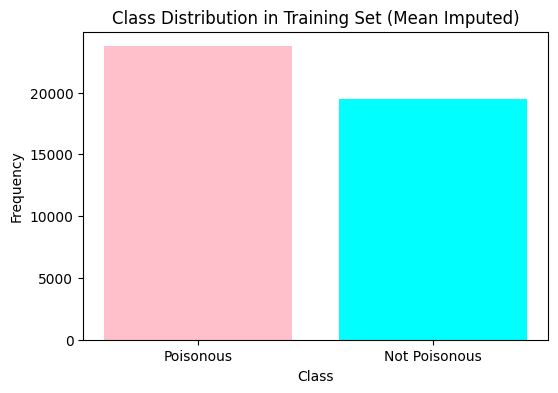

Class counts in the mean-imputed training set:
class
1    23740
0    19488
Name: count, dtype: int64


<Figure size 600x400 with 0 Axes>

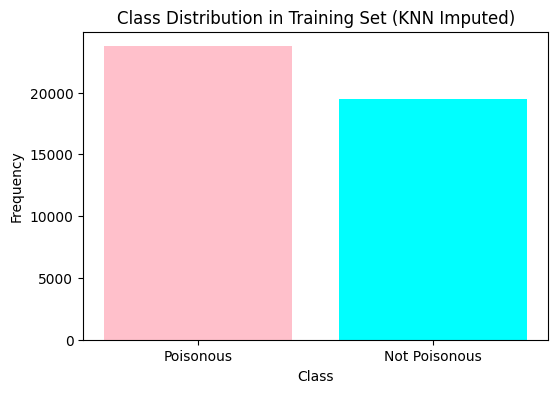

Class counts in the KNN-imputed training set:
class
1    23740
0    19488
Name: count, dtype: int64
class
1    29675
0    24360
Name: count, dtype: int64


In [ ]:
#your code here:
#chatGPT  is used in order to maintain consistency and readability of the code
#5a
scaler_mean = MinMaxScaler()
X_train_mean_scaled_df = scaler_mean.fit_transform(X_train_mean)
X_test_mean_scaled_norm_df = scaler_mean.transform(X_test_mean)

scaler_knn = MinMaxScaler()
X_train_knn_scaled_df = scaler_knn.fit_transform(X_train_KNN)
X_test_KNN_scaled_norm_df = scaler_knn.transform(X_test_KNN)

#chatGPT is used to print the charts
#5b
#Visual representation and value counts for y variable to check for imbalance.
plt.figure(figsize=(6, 4))
mushroom = pd.Series(y_train_mean).value_counts()
plt.figure(figsize=(6, 4))
plt.bar(mushroom.index.map({1: 'Poisonous', 0: 'Not Poisonous'}), mushroom.values, color=['pink', 'cyan']) # Bar plot for class distribution (mean imputed dataset)
plt.title('Class Distribution in Training Set (Mean Imputed)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#Print value counts of each class in the training set.
class_counts_mean = y_train_mean.value_counts()
print("Class counts in the mean-imputed training set:")
print(class_counts_mean)

#Do the same for the KNN imputed dataset.
plt.figure(figsize=(6, 4))
mushroom = pd.Series(y_train_mean).value_counts()
plt.figure(figsize=(6, 4))
plt.bar(mushroom.index.map({1:'Poisonous', 0: 'Not Poisonous'}), mushroom.values, color=['pink', 'cyan']) #Bar plot for class distribution (KNN imputed dataset).
plt.title('Class Distribution in Training Set (KNN Imputed)')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

#Print value counts of each class in the KNN-imputed training set.
class_counts_knn = y_train_KNN.value_counts()
print("Class counts in the KNN-imputed training set:")
print(class_counts_knn)

#Check the count of each category.
category_counts = y.value_counts()

#Print the count of each category.
print(category_counts)

#6. Choose one balancing method and perform it on your data.

Verbally explain the logic behind the chosen balancing metohd, how does it work?

<ipython-input-13-96834bf2e13a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_mean_balanced, palette='pastel')


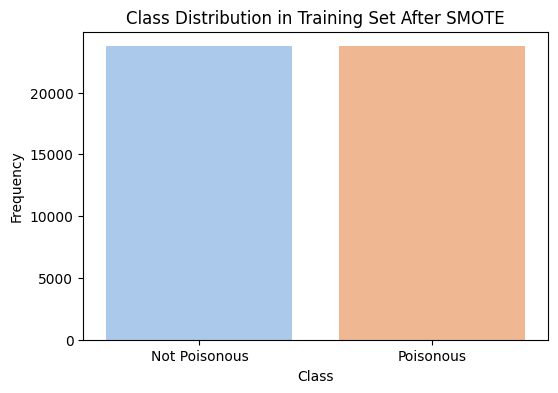

Class counts after SMOTE (Mean Imputed):
class
1    23740
0    23740
Name: count, dtype: int64


In [ ]:
#your code here, if balancing is requierd:
#We consulted about this question in the chat because there was no severe imbalance, so we were unsure how to proceed.
#Create a SMOTE object.
smote = SMOTE(random_state=42)

#Balance the data using SMOTE.
X_train_mean_balanced, y_train_mean_balanced = smote.fit_resample(X_train_mean_scaled_df, y_train_mean)
X_train_knn_balanced, y_train_knn_balanced = smote.fit_resample(X_train_knn_scaled_df , y_train_mean)

#chatGPT is used to print the chart
#Display the distribution after balancing using SMOTE.
plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_mean_balanced, palette='pastel')
plt.title('Class Distribution in Training Set After SMOTE')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks([0, 1], ['Not Poisonous', 'Poisonous'])
plt.show()

#Count each category after balancing.
class_counts_mean_balanced = pd.Series(y_train_mean_balanced).value_counts()
print("Class counts after SMOTE (Mean Imputed):")
print(class_counts_mean_balanced)


#Your answer here:



WORD תשובה בקובץ

#7. Training models (for both imputed datasets):
**a.** choose three classification algorithms, two must be either random forest or XGBoost or catboost or LGBM, and apply the algorithms on the train set.  

**b.** apply hyperparameter tuning on at least two algorithms using gridsearchCV function.

**c.** print the best hyperparameters for the three models.

Reminder, if the tuned model is named "grid" than to get the best hyperparameter combination use the following function:


```
grid.best_params_
```


**d.** Veraverbally explain: what is the role of the chosen hyperparmeters in the learning algorithms? How did you choose the values for the optimization? (in 3-4 lines)


In [ ]:
#your code here:
#Model 1- Random Forest.
#chatGPT used in order to maintain consistency and readability of the code. Adjustments were made in the parameters according to attempts to improve the indices
#Define the parameter grid for Random Forest.
param_grid_rf = {
    'n_estimators': [10, 20,30,40,50], #Number of trees in the forest.
    'max_depth': [7,8,9,10,11], #Maximum depth of the tree.
}

#Initialize the model.
rf = RandomForestClassifier(random_state=42)

#Initialize GridSearchCV.
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, refit=True, n_jobs=-1, verbose=3)

#Fit GridSearchCV for mean-imputed data.
grid_search_rf.fit(X_train_mean_balanced,y_train_mean_balanced)

#Print the best parameters and best score for Random Forest.
print("Best parameters for Random Forest (mean-imputed data):", grid_search_rf.best_params_)

grid_search_rf_knn = GridSearchCV(estimator=rf, param_grid=param_grid_rf, refit=True, n_jobs=-1, verbose=3)
grid_search_rf_knn.fit(X_train_knn_balanced, y_train_knn_balanced)
print("Best parameters for Random Forest (KNN-imputed data):", grid_search_rf_knn.best_params_)

#Model 2- CatBoost.
scaler = MinMaxScaler()
catboost_model = CatBoostClassifier(random_state=123, silent=True)
steps = [("scaler", scaler), ("classifier", catboost_model)]
pipeline = Pipeline(steps)
#Defining the hyperparameters.
cat_param_grid = {'classifier__depth':[6,7,8,9,10], 'classifier__iterations':[70,80,100,120,150],}

cat_grid_search = GridSearchCV(pipeline, param_grid=cat_param_grid, cv=2, n_jobs=-1, verbose=3)
cat_grid_search.fit(X_train_mean_balanced, y_train_mean_balanced)
print("Best parameters for CatBoost (mean-imputed data):", cat_grid_search.best_params_)

cat_grid_search_knn = GridSearchCV(pipeline, param_grid=cat_param_grid, cv=2, n_jobs=-1, verbose=3)
cat_grid_search_knn.fit(X_train_knn_balanced, y_train_knn_balanced)
print("Best parameters for CatBoost (KNN-imputed data):", cat_grid_search_knn.best_params_)

#We used ChatGPT to assist in implementing this algorithm.
#An algorithm not taught in class Gradient Boosting.
gb_model = GradientBoostingClassifier(random_state=42)
param_grid_gb = {
    'n_estimators':[100, 200],  #Count the trees.
    'learning_rate':[0.01, 0.1, 0.2]  #Learning Rate.
}

grid_search_gb_mean = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=3)
grid_search_gb_mean.fit(X_train_mean_balanced, y_train_mean_balanced)
print("Best parameters for Gradient Boosting (mean-imputed data):", grid_search_gb_mean.best_params_)

grid_search_gb_knn = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=3)
grid_search_gb_knn.fit(X_train_knn_balanced, y_train_knn_balanced)
print("Best parameters for Gradient Boosting (KNN-imputed data):", grid_search_gb_knn.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters for Random Forest (mean-imputed data): {'max_depth': 11, 'n_estimators': 50}
Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters for Random Forest (KNN-imputed data): {'max_depth': 11, 'n_estimators': 50}
Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best parameters for CatBoost (mean-imputed data): {'classifier__depth': 10, 'classifier__iterations': 120}
Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best parameters for CatBoost (KNN-imputed data): {'classifier__depth': 10, 'classifier__iterations': 150}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Gradient Boosting (mean-imputed data): {'learning_rate': 0.2, 'n_estimators': 200}
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Gradient Boosting (KNN-imputed data): {'learning_rate': 0.2, 'n_estimators': 200}


#Your answer here:



WORD תשובה בקובץ

#8. Train a neural network on both imputed datasets.

In [ ]:
#your code here:
#Model 1: Define the neural network.
model_mean = Sequential()
model_mean.add(Input(shape=(8,))) #Input layer with 8 features.

model_knn = Sequential()
model_knn.add(Input(shape=(8,))) #Input layer with 8 features.

#First hidden layer with 64 neurons + input layer.
model_mean.add(Dense(64, activation='relu'))

model_knn.add(Dense(64, activation='relu'))

#Second hidden layer with 32 neurons, includes Dropout for regularization.
model_mean.add(Dropout(0.5))
model_mean.add(Dense(32, activation='relu'))

model_knn.add(Dropout(0.5))
model_knn.add(Dense(32, activation='relu'))

#Output layer with sigmoid activation for binary classification.
model_mean.add(Dense(1, activation='sigmoid'))

model_knn.add(Dense(1, activation='sigmoid'))

#compile the model: using Adam (Adaptive Moment Estimation) optimizer, binary cross-entropy loss, and accuracy metric.
model_mean.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model_knn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Train on the second dataset.
history_mean=model_mean.fit(X_train_mean_scaled_df,y_train_mean_balanced, epochs=35, batch_size=33, validation_split=0.2)

history_knn = model_knn.fit(X_train_knn_scaled_df, y_train_knn_balanced, epochs=35, batch_size=33, validation_split=0.2)

#Display the models summary.
model_mean.summary()

model_knn.summary()

Epoch 1/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5876 - loss: 0.6638 - val_accuracy: 0.6585 - val_loss: 0.6063
Epoch 2/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6535 - loss: 0.6181 - val_accuracy: 0.6947 - val_loss: 0.5770
Epoch 3/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6778 - loss: 0.5905 - val_accuracy: 0.7141 - val_loss: 0.5542
Epoch 4/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6886 - loss: 0.5755 - val_accuracy: 0.7270 - val_loss: 0.5368
Epoch 5/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7024 - loss: 0.5622 - val_accuracy: 0.7427 - val_loss: 0.5216
Epoch 6/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7026 - loss: 0.5556 - val_accuracy: 0.7469 - val_loss: 0.5091
Epoch 7/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7212 - loss: 0.5405 - val_accuracy: 0.7614 - val_loss: 0.4973
Epoch 8/35
1048/1048 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7261 - loss: 0.5332 - 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                      │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,069 (31.52 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,380 (21.02 KB)

#Explain the structure of the network: how many layers? what layers? how manny weights/coefficients/parameters are there in your network? (2-3 sentences)

#Your answer here:



WORD תשובה בקובץ

#9. a. Predict the y variable on both the train set and the test set (for both imputed datasets and for both algorithms - 16 predictions in total):
2 imputed datasets * 4 models * (train+test)

and print the accuracy of each prediction.



In [ ]:
#your code here:
#chatGPT  was used to create the function to improve code readability and prevent code duplication
#Function to generate classification reports for each model.
def generate_reports(model, X_train, y_train, X_test, y_test, model_name, dataset_name):

#Predicting on the training set.
    y_train_pred = model.predict(X_train)
    print(f"\nClassification Report for {model_name} on {dataset_name} (Training Set):")
    print(classification_report(y_train, y_train_pred))

#Predicting on the test set.
    y_test_pred = model.predict(X_test)
    print(f"\nClassification Report for {model_name} on {dataset_name} (Test Set):")
    print(classification_report(y_test, y_test_pred))

#Example usage of the function with specific models and datasets.
generate_reports(grid_search_rf.best_estimator_,X_train_mean_scaled_df, y_train_mean,X_test_mean_scaled_norm_df, y_test_mean, "Random Forest", "Mean-Imputed Data")
generate_reports(grid_search_rf.best_estimator_, X_train_knn_scaled_df, y_train_KNN, X_test_KNN_scaled_norm_df, y_test_KNN, "Random Forest", "KNN-Imputed Data")
generate_reports(cat_grid_search.best_estimator_, X_train_mean_scaled_df, y_train_mean, X_test_mean_scaled_norm_df, y_test_mean, "CatBoost", "Mean-Imputed Data")
generate_reports(cat_grid_search.best_estimator_, X_train_knn_scaled_df, y_train_KNN, X_test_KNN_scaled_norm_df, y_test_KNN, "CatBoost", "KNN-Imputed Data")
generate_reports(grid_search_gb_mean.best_estimator_, X_train_mean_scaled_df, y_train_mean, X_test_mean_scaled_norm_df, y_test_mean, "Gradient Boosting", "Mean-Imputed Data")
generate_reports(grid_search_gb_knn.best_estimator_, X_train_knn_scaled_df, y_train_KNN, X_test_KNN_scaled_norm_df, y_test_KNN, "Gradient Boosting", "KNN-Imputed Data")

#Prediction on the Neural network .We use chatGPT to convert each of the categories:
#Prediction and report generation for Neural Network models.
#Neural network predictions on mean-imputed data.
y_train_mean_nn_pred = (model_mean.predict(X_train_mean_scaled_df) > 0.5).astype("int32")
y_test_mean_nn_pred = (model_mean.predict(X_test_mean_scaled_norm_df) > 0.5).astype("int32")
print("\nClassification Report for Neural Network on Mean-Imputed Data (Training Set):")
print(classification_report(y_train_mean, y_train_mean_nn_pred))
print("\nClassification Report for Neural Network on Mean-Imputed Data (Test Set):")
print(classification_report(y_test_mean, y_test_mean_nn_pred))

#Neural network predictions on KNN-imputed data.
y_train_knn_nn_pred = (model_knn.predict(X_train_knn_scaled_df) > 0.5).astype("int32")
y_test_knn_nn_pred = (model_knn.predict(X_test_KNN_scaled_norm_df) > 0.5).astype("int32")
print("\nClassification Report for Neural Network on KNN-Imputed Data (Training Set):")
print(classification_report(y_train_KNN, y_train_knn_nn_pred))
print("\nClassification Report for Neural Network on KNN-Imputed Data (Test Set):")
print(classification_report(y_test_KNN, y_test_knn_nn_pred))


Classification Report for Random Forest on Mean-Imputed Data (Training Set):
              precision    recall  f1-score   support

           0       0.88      0.97      0.93     19488
           1       0.98      0.89      0.93     23740

    accuracy                           0.93     43228
   macro avg       0.93      0.93      0.93     43228
weighted avg       0.93      0.93      0.93     43228


Classification Report for Random Forest on Mean-Imputed Data (Test Set):
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4872
           1       0.97      0.89      0.92      5935

    accuracy                           0.92     10807
   macro avg       0.92      0.92      0.92     10807
weighted avg       0.92      0.92      0.92     10807


Classification Report for Random Forest on KNN-Imputed Data (Training Set):
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     19488
        

#b. Based on the accuracies of the predictions, verbally explain which model resulted with the best outcome with consideration to over-fitting, under-fitting and proper-fitting.

#Your answer here:
WORD תשובה בקובץ



#Print the classification_report of the test set using the best model and verbally explain another quality measure of your choice.

In [ ]:
#your code here:
best_model = grid_search_rf.best_estimator_

#Predict on the test set.
y_pred_test = best_model.predict(X_test_mean_scaled_norm_df)

#Print classification report for the test set.
print("Classification Report (Test Set) for Best Model:")
print(classification_report(y_test_mean, y_pred_test))


Classification Report (Test Set) for Best Model:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      4872
           1       0.97      0.89      0.92      5935

    accuracy                           0.92     10807
   macro avg       0.92      0.92      0.92     10807
weighted avg       0.92      0.92      0.92     10807



#Your answer here:
WORD תשובה בקובץ




#Part B:

#10. Data preprocessing:

#Upload the second table (for regression analysis):

In [ ]:
#your code here:
df_ApartmentPrices= pd.read_csv("Apartment Prices.csv")
df_ApartmentPricesCo = df_ApartmentPrices.copy()

#Read the file into a pandas data frame:
Split your data to:

a. X: the feature matrix

b. y: the label vector

In [ ]:
#your code here:
x_aprt=df_ApartmentPricesCo.drop('PRICE (GEL)',axis=1)
y_aprt=df_ApartmentPricesCo['PRICE (GEL)']

#10.A. Check for missing values:

In [ ]:
#your code here:
print("Missing values before filling:")
print(df_ApartmentPricesCo.isnull().sum())

Missing values before filling:
CityPart                   0
Area                       0
Rooms                      0
Bedrooms                 235
Floor                      1
MaxFloor                   1
LastFloor                  0
Status                     4
Condition                503
Electrical Points        596
Heating                 2098
Natural Gas                4
Bed                        0
Stove (Gas/Electric)       0
Table                      0
Refrigerator               0
Chairs                     0
Oven                       0
Air Conditioner            0
Washing Machine            0
Sofa                       0
Dishwasher                 0
PRICE (GEL)                0
dtype: int64


#10.B. Impute the missing values using two different methods and assign the imputed output datasets into variables:

In [ ]:
#your code here:
#Identify columns with missing values.
missing_cols = df_ApartmentPricesCo.columns[df_ApartmentPricesCo.isnull().any()].tolist()

#Handling missing values.
for col in missing_cols:
#Check if the column is numeric.
    if df_ApartmentPricesCo[col].dtype in ['float64', 'int64']:
#Fill numeric columns with the mean value.
        df_ApartmentPricesCo[col] = df_ApartmentPricesCo[col].fillna(df_ApartmentPricesCo[col].mean())
    else:
#Fill non-numeric columns with the last non-null value.
        df_ApartmentPricesCo[col] = df_ApartmentPricesCo[col].fillna(method='ffill')

#Check the number of missing values after filling.
missing_values = df_ApartmentPricesCo.isnull().sum()
print(missing_values)

CityPart                0
Area                    0
Rooms                   0
Bedrooms                0
Floor                   0
MaxFloor                0
LastFloor               0
Status                  0
Condition               0
Electrical Points       0
Heating                 0
Natural Gas             0
Bed                     0
Stove (Gas/Electric)    0
Table                   0
Refrigerator            0
Chairs                  0
Oven                    0
Air Conditioner         0
Washing Machine         0
Sofa                    0
Dishwasher              0
PRICE (GEL)             0
dtype: int64


<ipython-input-21-acab979860e8>:13: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_ApartmentPricesCo[col] = df_ApartmentPricesCo[col].fillna(method='ffill')


#10.C. Convert categorical features to dummy variables if number of categories is lower than 5, otherwise remove from data.


In [ ]:
#your code here:
for col in x_aprt.select_dtypes(include=['object']).columns:

#Check if the number of unique values in the column is greater than 4.
    if x_aprt[col].nunique() > 4:
       x_aprt.drop(col, axis=1, inplace=True)
    else:
#Drop the column if it has more than 4 unique values.
       x_aprt = pd.get_dummies(x_aprt, columns=[col], drop_first=True)

#Check and handle unrealistic values in the dataset.
print(x_aprt.describe())
for col in x_aprt.select_dtypes(include=['number']).columns:

#Define lower and upper bounds based on the 1st and 99th percentiles.
    lower_bound = x_aprt[col].quantile(0.01)
    upper_bound = x_aprt[col].quantile(0.99)

#Replace values outside the bounds with NaN.
    x_aprt[col] = np.where((x_aprt[col] < lower_bound) | (x_aprt[col] > upper_bound), np.nan, x_aprt[col])

#Fill in missing values created from replacing unrealistic values with the mean of each column.
x_aprt.fillna(x_aprt.mean(), inplace=True)

                Area        Rooms     Bedrooms        Floor     MaxFloor  \
count    7258.000000  7258.000000  7023.000000  7257.000000  7257.000000   
mean      116.794622     2.886746     1.805639     6.974921    11.914152   
std      1875.877409     1.052626     0.829334     5.027288     6.302284   
min        14.500000     1.000000     1.000000     1.000000     1.000000   
25%        55.500000     2.000000     1.000000     3.000000     8.000000   
50%        72.000000     3.000000     2.000000     6.000000    11.000000   
75%        98.000000     3.000000     2.000000    10.000000    15.000000   
max    120240.000000    10.000000    10.000000    36.000000    80.000000   

         LastFloor  Electrical Points  Natural Gas          Bed  \
count  7258.000000        6662.000000  7254.000000  7258.000000   
mean      0.151832           1.230561     0.726496     0.305594   
std       0.358883           0.484849     0.445788     0.460690   
min       0.000000           1.000000     0.000

#10.D. Train test split:

In [ ]:
#your code here:
X_train_aprt, X_test_aprt, y_train_aprt, y_test_aprt = train_test_split(x_aprt,y_aprt, test_size=0.2, random_state=42)

#10.D. standardize or normalize the data

  

In [ ]:
#your code here:
mms = MinMaxScaler()
x_aprt_norm= mms.fit_transform(x_aprt)
x_aprt_norm = pd.DataFrame(x_aprt_norm, columns=x_aprt.columns)
print("after the normalization: /n")
print(x_aprt_norm)
print (y_aprt)

after the normalization: /n
          Area     Rooms  Bedrooms     Floor  MaxFloor  LastFloor  \
0     0.223730  0.369126  1.000000  0.227273  0.133333        1.0   
1     0.056769  0.200000  0.000000  0.636364  0.933333        0.0   
2     0.279476  0.400000  0.333333  0.263628  0.933333        0.0   
3     0.279476  0.400000  0.333333  0.263628  0.933333        0.0   
4     0.423581  0.600000  0.666667  0.772727  0.933333        0.0   
...        ...       ...       ...       ...       ...        ...   
7253  0.257642  0.600000  0.666667  0.227273  0.266667        0.0   
7254  0.213974  0.400000  0.333333  0.272727  0.200000        0.0   
7255  0.969432  1.000000  0.666667  0.272727  0.200000        0.0   
7256  0.196507  0.200000  0.000000  0.136364  0.233333        0.0   
7257  0.593886  0.800000  0.666667  0.500000  0.366667        0.0   

      Electrical Points  Natural Gas  Bed  Stove (Gas/Electric)  Table  \
0              1.000000     1.000000  0.0                   0.0    1.

#11. Train a linear regression model:

In [ ]:
#your code here:
#Function to calculate Mean Absolute Percentage Error.
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#Create a Linear Regression model.
regressor = LinearRegression()

#Fit the model on the training data.
regressor.fit(X_train_aprt, y_train_aprt)

LinearRegression()

#12. On both the train set and the test set, predict the values based on the linear regression model and print the following measures:

	*  R^2
	*  Root Mean Square Error (RMSE)
	*  Mean Absolut Error (MAE)
	*  Mean Absolut Percent Error (MAPE)



In [ ]:
#your code here:
#Predict results on the test set.
y_pred_aprt = regressor.predict(X_test_aprt)

#model evaluation for test set.
Lin_r2=r2_score(y_test_aprt, y_pred_aprt) #Calculate R-squared.
RMSE = (np.sqrt(mean_squared_error(y_test_aprt, y_pred_aprt))) #Calculate Root Mean Squared Error.
MAE= mean_absolute_error(y_test_aprt, y_pred_aprt) #Calculate Mean Absolute Error.
MAPE=mean_absolute_percentage_error(y_test_aprt, y_pred_aprt) #Calculate Mean Absolute Percentage Error.

#Display the model performance metrics for the test set.
print("The model performance for testing set:")
print('R-squared is {}'.format(Lin_r2))
print('RMSE is {}'.format(RMSE))
print('MAE score is {}'.format(MAE))
print('MAPE score is {}'.format(MAPE) ,"\n")

#Evaluate the model on the training set.
y_pred_train_aprt = regressor.predict(X_train_aprt) #Predict on the training set.
lin_r2_train=r2_score(y_train_aprt, y_pred_train_aprt) #Calculate R-squared for training set.
RMSE_train = (np.sqrt(mean_squared_error(y_train_aprt, y_pred_train_aprt))) #Calculate RMSE for training set.
MAE_train= mean_absolute_error(y_train_aprt, y_pred_train_aprt) #Calculate MAE for training set.
MAPE_train=mean_absolute_percentage_error(y_train_aprt, y_pred_train_aprt) #Calculate MAPE for training set.

#Display the model performance metrics for the training set.
print("The model performance for training set:")
print('R-squared is {}'.format(lin_r2_train))
print('RMSE is {}'.format(RMSE_train))
print('MAE score is {}'.format(MAE_train))
print('MAPE score is {}'.format(MAPE_train))

The model performance for testing set:
R-squared is -0.0016703850931609754
RMSE is 2297895.1105726887
MAE score is 282577.92031437973
MAPE score is 196.22620369890257 

The model performance for training set:
R-squared is 0.011754846542810893
RMSE is 3759425.0669974457
MAE score is 283811.30916414753
MAPE score is 17636.35427142282


#13. Polynomial regression: follow instruction in the attached documnet.

In [ ]:
#Transform the original features to polynomial features.
poly = PolynomialFeatures()
X_poly = poly.fit_transform(x_aprt_norm) #Transforming the original features to polynomial features.
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_aprt, test_size = 0.2, random_state=123)

#Ignore convergence warnings.
warnings.filterwarnings("ignore", category=ConvergenceWarning)

#Parameter definitions.
degrees_to_test = [2 ]#3, 4]  #Polynomial degrees to test. Degree 2 was found to perform best, so higher degrees were skipped.
alphas = [0.01, 0.1, 1, 10, 100]  #Alpha values to test.

#Dictionary to keep track of the best results
best_results = {
    'model': None,
    'alpha': None,
    'degree': None,
    'mae': float('inf') #Initialize with infinity to find the minimum MAE.
}

#Initial data split for train and test sets using a fixed random state.
X_train, X_test, y_train, y_test = train_test_split(x_aprt_norm, y_aprt, test_size=0.2, random_state=123)

#Loop to evaluate models for each polynomial degree.
for degree in degrees_to_test:
    for model_type, model in [('Lasso', Lasso()), ('Ridge', Ridge())]:

#Define a pipeline with PolynomialFeatures and Lasso/Ridge regression.
        pipeline = Pipeline([('poly', PolynomialFeatures(degree=degree, interaction_only=True)),('model', model)])

#Grid search to find the best alpha value.
        param_grid = {'model__alpha': alphas}
        grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_error', cv=3)

#Fit the model and evaluate it.
        grid_search.fit(X_train, y_train)

#Calculate MAE for the best alpha and degree found.
        mae = -grid_search.best_score_

#Update the best results if a lower MAE is found.
        if mae < best_results['mae']:
            best_results.update({'model': model_type,'alpha': grid_search.best_params_['model__alpha'],'degree': degree,'mae': mae})

#Print the best results.
print("Best Polynomial Degree (d):", best_results['degree'])
print("Best Model:", best_results['model'])
print("Best Regularization Strength (alpha):", best_results['alpha'])
print("Best Mean Absolute Error (MAE): {:.4f}".format(best_results['mae']))

#Function to evaluate model performance metrics.
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return r2, rmse, mae, mape

#Prediction on the training set and the test set.
best_model = best_results['model']  #Store the best model type.
best_degree = best_results['degree']
best_alpha = best_results['alpha']

#Build the pipeline with the best settings.
pipeline = Pipeline([('poly', PolynomialFeatures(degree=best_degree, interaction_only=True)),('model', Lasso(alpha=best_alpha) if best_model == 'Lasso' else Ridge(alpha=best_alpha))])

#Fit the model with the data.
pipeline.fit(X_train, y_train)

#Prediction and performance evaluation on the test set.
y_pred_test = pipeline.predict(X_test)
r2_test, rmse_test, mae_test, mape_test = evaluate_model(y_test, y_pred_test)

print("The model performance for the test set:")
print(f'R-squared: {r2_test:.4f}')
print(f'RMSE: {rmse_test:.4f}')
print(f'MAE: {mae_test:.4f}')
print(f'MAPE: {mape_test:.4f}\n')

#Prediction and performance evaluation on the training set.
y_pred_train = pipeline.predict(X_train)
r2_train, rmse_train, mae_train, mape_train = evaluate_model(y_train, y_pred_train)

print("The model performance for the training set:")
print(f'R-squared: {r2_train:.4f}')
print(f'RMSE: {rmse_train:.4f}')
print(f'MAE: {mae_train:.4f}')
print(f'MAPE: {mape_train:.4f}')

Best Polynomial Degree (d): 2
Best Model: Ridge
Best Regularization Strength (alpha): 100
Best Mean Absolute Error (MAE): 264633.2870
The model performance for the test set:
R-squared: 0.0013
RMSE: 2307856.3602
MAE: 269274.6763
MAPE: 63751.5832

The model performance for the training set:
R-squared: 0.0196
RMSE: 3742368.1763
MAE: 254802.7434
MAPE: 172.3060


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#14. Verbally explain the problem with polynomial transformation of features. How can it be solved? (2-3 sentences).

#Your answer here:
WORD תשובה בקובץ



#Verbally explain what are ridge and lasso? when shoud each be used? what's the diffrence between them? (up to 4 sentences)

#Your answer here:
WORD תשובה בקובץ


#15. Train additional algorithms as specified in the attached document.

In [ ]:
#your code here:
#randomforestRegressor model:
RF_model = RandomForestRegressor(random_state=42)

#Parameter definition for RandomForestRegressor.
rf_param_grid = {
    'n_estimators': [100, 200], #Number of trees in the forest.
    'max_depth': [None, 10, 20] #Maximum depth of each tree.
}

#Performing GridSearchCV to find the best parameters for the RandomForest model.
rf_grid_search = GridSearchCV(estimator=RF_model, param_grid=rf_param_grid, cv=5, n_jobs=-1)
rf_grid_search.fit(X_train_aprt, y_train_aprt)

#Storing the best model based on the grid search results.
best_rf_model = rf_grid_search .best_estimator_
print("Best parameters for RandomForest:", rf_grid_search.best_params_)

#Catboostregressor model:
param_grid_cat = {
    'iterations': [100, 200], #Number of trees.
    'depth': [6, 10] #Depth of trees.
}

#Defining CatBoostRegressor and performing GridSearchCV to find the best parameters.
cat = CatBoostRegressor(random_state=123, verbose=0)
cat_search = GridSearchCV(cat, param_grid=param_grid_cat, cv=5, n_jobs=-1)
cat_search.fit(X_train_aprt, y_train_aprt)

#Storing the best model based on the grid search results.
best_cat_model = cat_search.best_estimator_
print("Best parameters for CatBoost:", cat_search.best_params_)

#LGBMRegressor model.
LGBM_model = LGBMRegressor(random_state=123)
LGBM_model.fit(X_train_aprt, y_train_aprt)

#Defining a dictionary to store the models for later evaluation.
models = {'RandomForest': best_rf_model, 'CatBoost': best_cat_model, 'LGBM': LGBM_model}

for model_name, model in models.items():
#Predicting on the training set.
    y_train_pred = model.predict(X_train_aprt)
    r2_train, rmse_train, mae_train, mape_train = evaluate_model(y_train_aprt, y_train_pred)

 #Predicting on the testing set.
    y_test_pred = model.predict(X_test_aprt)
    r2_test, rmse_test, mae_test, mape_test = evaluate_model(y_test_aprt, y_test_pred)

    print(f"Performance of {model_name}:")
    print("Training set:")
    print(f"R^2: {r2_train:.2f}, RMSE: {rmse_train:.2f}, MAE: {mae_train:.2f}, MAPE: {mape_train:.2f}")
    print("Testing set:")
    print(f"R^2: {r2_test:.2f}, RMSE: {rmse_test:.2f}, MAE: {mae_test:.2f}, MAPE: {mape_test:.2f}")

Best parameters for RandomForest: {'max_depth': None, 'n_estimators': 100}
Best parameters for CatBoost: {'depth': 6, 'iterations': 100}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 354
[LightGBM] [Info] Number of data points in the train set: 5806, number of used features: 20
[LightGBM] [Info] Start training from score 425479.408887
Performance of RandomForest:
Training set:
R^2: 0.77, RMSE: 1799476.67, MAE: 85001.22, MAPE: 4657.21
Testing set:
R^2: 0.01, RMSE: 2280493.25, MAE: 153352.48, MAPE: 115.84
Performance of CatBoost:
Training set:
R^2: 1.00, RMSE: 184409.35, MAE: 98621.08, MAPE: 3817.23
Testing set:
R^2: -4.05, RMSE: 5160673.40, MAE: 338661.17, MAPE: 185.47
Performance of LGBM:
Training set:

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'roo

#16. Verbally explain: which model is the best? Briefly explain the model predictions outcome in terms of over and under fitting -explain.
#Explain each of the 4 error measuers presented and how they coul be interpreted in the context of your data specifically?

#Your answer here:
WORD תשובה בקובץ

#Good Luck!